In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

In [3]:
def is_valid_image(filepath):
    try:
        img = Image.open(filepath)
        img.verify()  # Verify that it is, in fact, an image
        return True
    except (IOError, SyntaxError) as e:
        print(f"Bad file: {filepath}")
        return False

def filter_valid_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            if not is_valid_image(filepath):
                os.remove(filepath)

In [4]:
train_dir = r"C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Training and Validation"
test_dir = r"C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing"

In [5]:
filter_valid_images(train_dir)
filter_valid_images(test_dir)

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 6443 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


In [8]:
test_dataset.class_indices


{'fire': 0, 'nofire': 1}

In [10]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
try:
    r = model.fit(
        train_dataset,
        epochs=15,
        validation_data=test_dataset,
        verbose=1
    )
except Exception as e:
    print(f"Error during training: {str(e)}")
    # Check if datasets are properly loaded
    print(f"Train dataset size: {len(train_dataset)}")
    print(f"Test dataset size: {len(test_dataset)}")

Epoch 1/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9205 - loss: 0.2233 - val_accuracy: 0.9310 - val_loss: 0.2250
Epoch 2/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 69s 330ms/step - accuracy: 0.9458 - loss: 0.1496 - val_accuracy: 0.9569 - val_loss: 0.1652
Epoch 3/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 259ms/step - accuracy: 0.9608 - loss: 0.1119 - val_accuracy: 0.9828 - val_loss: 0.1386
Epoch 4/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 58s 285ms/step - accuracy: 0.9718 - loss: 0.0872 - val_accuracy: 0.9655 - val_loss: 0.1592
Epoch 5/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 234ms/step - accuracy: 0.9716 - loss: 0.0819 - val_accuracy: 0.9569 - val_loss: 0.1837
Epoch 6/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.9746 - loss: 0.0702 - val_accuracy: 0.9483 - val_loss: 0.1791
Epoch 7/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 42s 207ms/step - accuracy: 0.9833 - loss: 0.0464 - val_accuracy: 0.9483 - val_loss: 0.2217
Epoch 8/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 219ms/step - accuracy: 0.9843 - loss: 0.0

In [14]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


In [15]:
predictions


array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

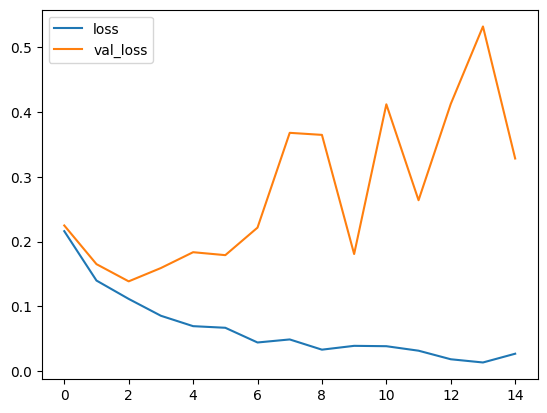

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

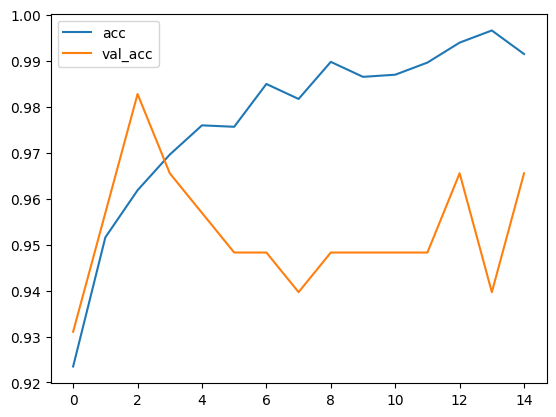

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0.]]


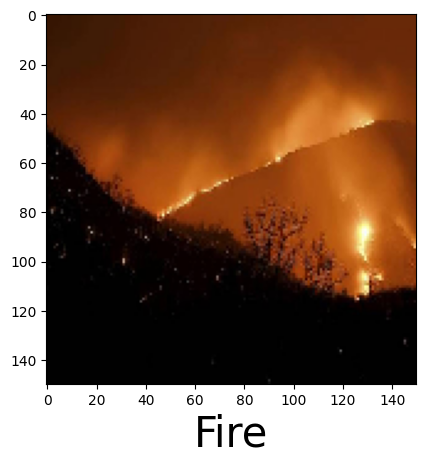

In [19]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\fire\test_fire (1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.]]


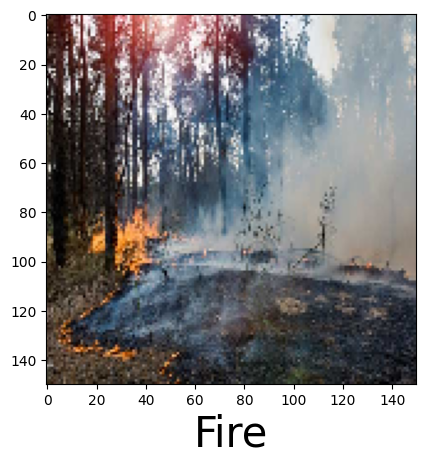

In [20]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\fire\test_fire (11).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.]]


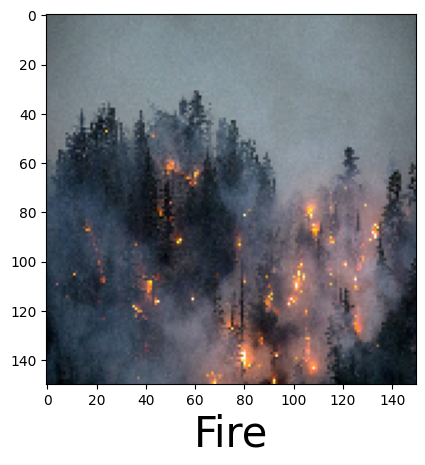

In [21]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\fire\test_fire (19).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.]]


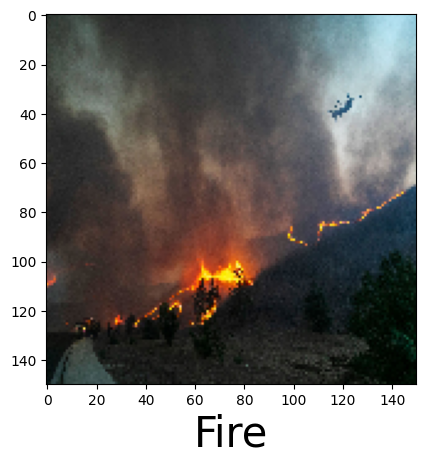

In [23]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\fire\test_fire (17).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.]]


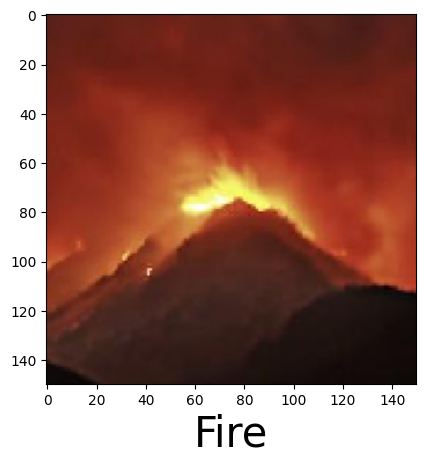

In [24]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\fire\test_fire (36).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.]]


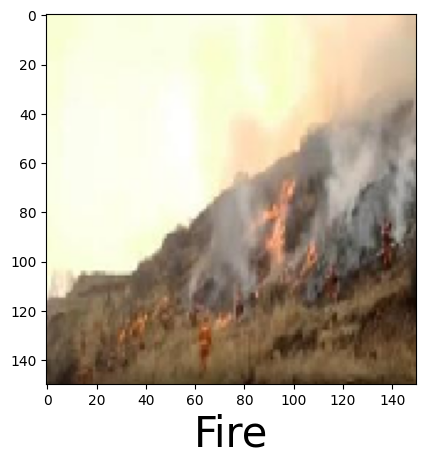

In [36]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\fire\test_fire (45).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.]]


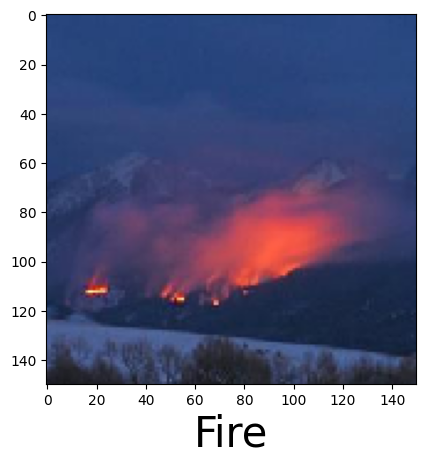

In [37]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\fire\test_fire (37).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1.]]


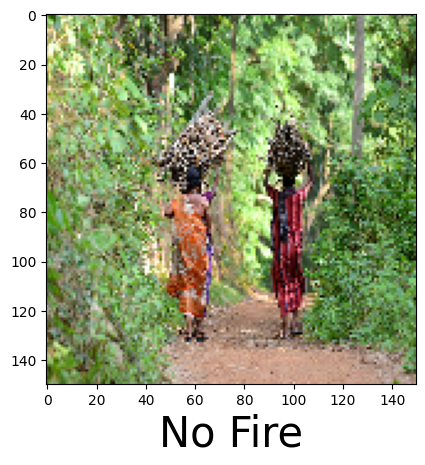

In [27]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\nofire\test_nofire (2).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[1.]]


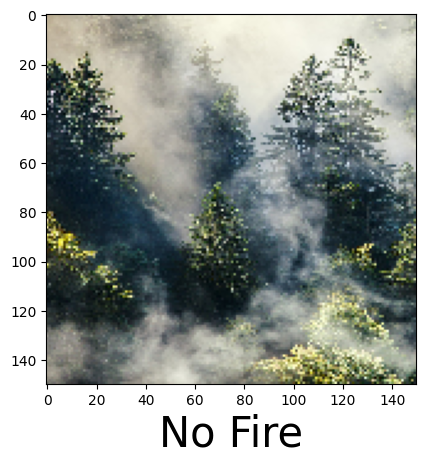

In [25]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\nofire\test_nofire (17).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.]]


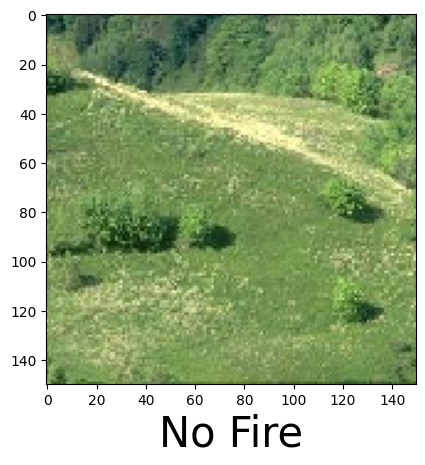

In [26]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\nofire\test_nofire (33).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.]]


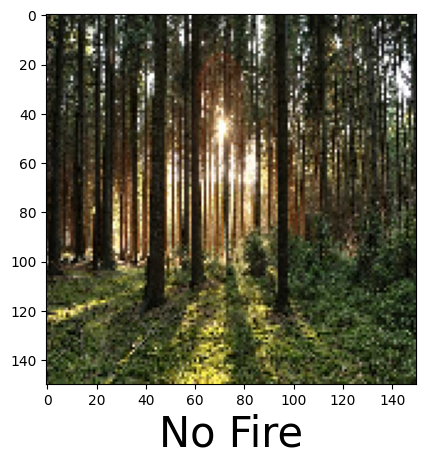

In [28]:
predictImage(r'C:\Users\BELDHARI SATVICK\Downloads\Forest Fire Detection Project\Data\Testing\nofire\test_nofire (6).jpg')

In [29]:
model.save('fire_detection_model.h5')

In [30]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('fire_detection_model.h5')

# Verify the model
loaded_model.summary()  # Check model structure
loss, accuracy = loaded_model.evaluate(test_dataset)  # Test the model using existing test_dataset
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9737 - loss: 0.2297
Test Loss: 0.3284178078174591
Test Accuracy: 0.9655172228813171
